In [13]:
# Import all dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create a set of rendom latitudes and longitude combinations.

lats = np.random.uniform(low= -90.000, high= 90.000, size = 1600)

lngs = np.random.uniform(low = -180.000, high = 180.00, size = 1600)

lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [17]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-83.15048090154663 -44.37015194751439
-73.49097058894431 -118.22122421052254
-77.33125318804467 50.65356814342201
58.08463118906579 8.456070734255121
82.1270208282101 139.98150508950414
-7.4526680742999645 -126.9425065565504
-54.6837908433716 129.09500982599565
-29.317714329555905 -28.274665919734446
24.759583007320572 -159.40529571338357
58.0818147358826 34.03830082317103
38.99899364541926 -145.7269407599673
33.792892899884905 -141.96432966503545
-0.7917271980449243 154.76856397084242
-8.397607482863265 54.14549938841759
73.73351453056665 169.67347094257514
49.660203720674076 40.77554655226359
8.141171623578344 -8.706435923544177
-74.05774573090176 -132.32505231836555
-46.81537842591209 134.17827966835722
24.65404199096703 87.54095094147283
-66.82996062340086 70.24433237713617
-39.38745125686817 -74.4576341918229
-70.23727184475133 103.86716587150266
80.73768297372743 170.8069193601233
85.48567927235831 -159.18981286415163
-56.24655382469064 40.51093702972784
-70.91211537510392 142.07

-67.46864929990761 155.33135029946578
-24.7582044268063 88.9639230431577
9.459886908295417 -157.97886963474997
12.70083325771138 36.66154407075186
76.0601578954165 54.69952005853298
-41.44218350631621 124.38481952550114
6.3307357207273185 -94.47590556446136
60.25060671948032 -91.04502377785346
-60.85024440095511 -14.026421546154637
51.19167146410538 66.98244616978343
14.46860042462228 -130.5799199462071
-67.09101573531811 44.03482283251583
-56.75654870190507 64.63581897092322
13.201472898020114 -23.3736871664222
58.898677462203665 -13.248415587485397
37.81675572702956 -58.270956792266375
-44.98176948777415 156.3279985620224
56.42711871108477 -49.13768292847564
68.23645974554242 -123.45307565468448
79.43812944213983 120.46972839749753
-8.94436390169976 -173.7324957857699
8.551155328935977 96.20854825169647
-77.59226251543606 24.259835247221673
-63.224945589672544 -6.690164515363023
11.182122920532464 -63.18818567807489
18.267335241954044 68.89691500366499
-7.221235213890594 24.656902922

In [18]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [19]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [20]:
# Import the time library and the datetime module from the datetime library 
import time 
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | lillesand
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | berezayka
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | namatanai
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | boguchar
Processing Record 17 of Set 1 | lola
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | pakaur
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | valdivia
Processing Record 22 of Set 1 | albany
Process

Processing Record 41 of Set 4 | mandalgovi
Processing Record 42 of Set 4 | talnakh
Processing Record 43 of Set 4 | preobrazheniye
Processing Record 44 of Set 4 | saleaula
City not found. Skipping...
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | sataua
City not found. Skipping...
Processing Record 47 of Set 4 | garoua
Processing Record 48 of Set 4 | rocha
Processing Record 49 of Set 4 | provost
Processing Record 50 of Set 4 | remanso
Processing Record 1 of Set 5 | dakar
Processing Record 2 of Set 5 | east wenatchee bench
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | quatre cocos
Processing Record 6 of Set 5 | nizwa
Processing Record 7 of Set 5 | ippy
Processing Record 8 of Set 5 | praia
Processing Record 9 of Set 5 | kalianget
Processing Record 10 of Set 5 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 11 of Set 5 | tiksi
Processing Record 12 of Set 5 | mahebourg
Processing Record

Processing Record 27 of Set 8 | taoudenni
Processing Record 28 of Set 8 | manchester
Processing Record 29 of Set 8 | bay roberts
Processing Record 30 of Set 8 | minab
Processing Record 31 of Set 8 | antalaha
Processing Record 32 of Set 8 | tazovskiy
Processing Record 33 of Set 8 | kahului
Processing Record 34 of Set 8 | bakchar
Processing Record 35 of Set 8 | geraldton
Processing Record 36 of Set 8 | cedar falls
Processing Record 37 of Set 8 | storm lake
Processing Record 38 of Set 8 | soe
Processing Record 39 of Set 8 | taltal
Processing Record 40 of Set 8 | bom jesus
Processing Record 41 of Set 8 | belchatow
Processing Record 42 of Set 8 | semirom
Processing Record 43 of Set 8 | newberry
Processing Record 44 of Set 8 | maraa
Processing Record 45 of Set 8 | cazaje
City not found. Skipping...
Processing Record 46 of Set 8 | penha
Processing Record 47 of Set 8 | akdagmadeni
Processing Record 48 of Set 8 | nishihara
Processing Record 49 of Set 8 | maningrida
Processing Record 50 of Set 8

Processing Record 12 of Set 12 | iroquois falls
Processing Record 13 of Set 12 | rochelle
Processing Record 14 of Set 12 | saint-georges
Processing Record 15 of Set 12 | tommot
Processing Record 16 of Set 12 | ulu-telyak
Processing Record 17 of Set 12 | tapaua
City not found. Skipping...
Processing Record 18 of Set 12 | sangar
Processing Record 19 of Set 12 | tarauaca
Processing Record 20 of Set 12 | ancud
Processing Record 21 of Set 12 | fukue
Processing Record 22 of Set 12 | rawson
Processing Record 23 of Set 12 | vardo
Processing Record 24 of Set 12 | kostomuksha
Processing Record 25 of Set 12 | mastic beach
Processing Record 26 of Set 12 | nouadhibou
Processing Record 27 of Set 12 | udachnyy
Processing Record 28 of Set 12 | pitimbu
Processing Record 29 of Set 12 | zyryanka
Processing Record 30 of Set 12 | atambua
Processing Record 31 of Set 12 | diourbel
Processing Record 32 of Set 12 | marakkanam
Processing Record 33 of Set 12 | castelo do piaui
Processing Record 34 of Set 12 | ke

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,47.86,61,100,5.75,AR,2022-05-12 00:59:52
1,Punta Arenas,-53.1500,-70.9167,42.12,81,100,7.70,CL,2022-05-12 01:01:37
2,Port Alfred,-33.5906,26.8910,59.70,80,0,5.68,ZA,2022-05-12 01:02:33
3,Lillesand,58.2488,8.3778,48.24,76,40,10.36,NO,2022-05-12 01:02:33
4,Atuona,-9.8000,-139.0333,79.11,74,25,19.62,PF,2022-05-12 01:02:34
5,Mount Gambier,-37.8333,140.7667,57.11,100,100,4.61,AU,2022-05-12 01:02:35
6,Sao Joao Da Barra,-21.6403,-41.0511,72.72,86,8,9.95,BR,2022-05-12 01:02:35
7,Kapaa,22.0752,-159.3190,82.38,80,70,8.01,US,2022-05-12 01:02:36
8,Berezayka,57.9883,33.9036,47.71,84,100,4.43,RU,2022-05-12 01:02:37
9,Kodiak,57.7900,-152.4072,46.67,53,100,6.26,US,2022-05-12 01:00:52


In [31]:
city_data_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df =city_data_df[city_data_reorder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-05-12 00:59:52,-54.8000,-68.3000,47.86,61,100,5.75
1,Punta Arenas,CL,2022-05-12 01:01:37,-53.1500,-70.9167,42.12,81,100,7.70
2,Port Alfred,ZA,2022-05-12 01:02:33,-33.5906,26.8910,59.70,80,0,5.68
3,Lillesand,NO,2022-05-12 01:02:33,58.2488,8.3778,48.24,76,40,10.36
4,Atuona,PF,2022-05-12 01:02:34,-9.8000,-139.0333,79.11,74,25,19.62
5,Mount Gambier,AU,2022-05-12 01:02:35,-37.8333,140.7667,57.11,100,100,4.61
6,Sao Joao Da Barra,BR,2022-05-12 01:02:35,-21.6403,-41.0511,72.72,86,8,9.95
7,Kapaa,US,2022-05-12 01:02:36,22.0752,-159.3190,82.38,80,70,8.01
8,Berezayka,RU,2022-05-12 01:02:37,57.9883,33.9036,47.71,84,100,4.43
9,Kodiak,US,2022-05-12 01:00:52,57.7900,-152.4072,46.67,53,100,6.26


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

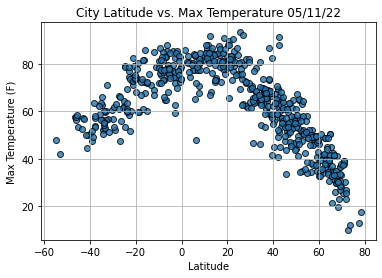

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


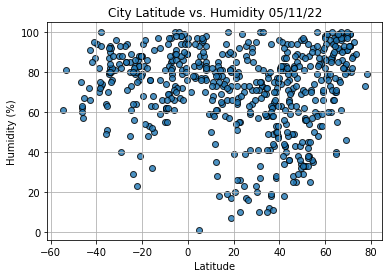

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


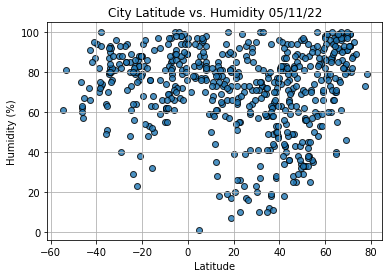

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

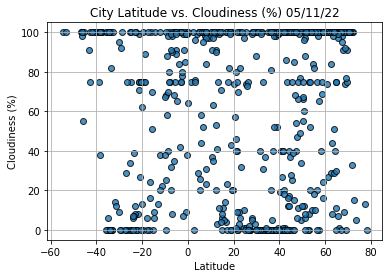

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

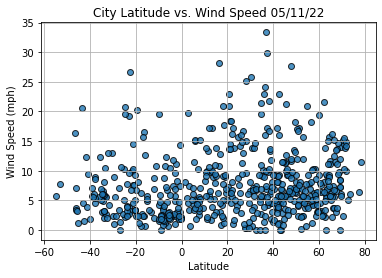

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()